# Analyse Univariée

## Résumé :

- On constate qu'il n'y a pas un énorme déséquilibre entre le nombres d'hommes et de femmes dans ce dataset
80966 hommes pour 62613 femmes.
- Les clients ayant entre 1 et 9 ans d’ancienneté sont majoritaires, avec des effectifs assez équilibrés.
- Les clients ayant moins d’un an (Tenure == 0) ou plus de 9 ans (Tenure == 10) sont sous-représentés.<br>
- La médiane de la répartition de l'ancienneté est centré à 5 ans, 50% des clients ont entre 3 et 7 ans d'ancienneté
Durée de vie de la banque ?
- Si la banque n’a que 10 ans, alors c’est normal de ne pas avoir plus d’ancienneté.
- Pareil pour Tenure == 0 : si on collecte les données en cours d’année, certains clients ne sont pas encore à 1 an
- La majorité des clients souscrivent à 1 ou 2 produits et très peu à plus de 2 produits.
- La majorité des clients se situe en France, l'allemagne et l'espagne ont un nombre équivalent de clients.
- La majorité des clients possèdent une carte de crédit. 
- Le nombre de clients actif et non actif sont réparti de manière égale

### Import des packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import du jeu de données d'entraînement

In [2]:
df_train = pd.read_csv("train_data.csv")
df_train = df_train.drop_duplicates(subset="CustomerId", keep="first")
df_train.reset_index(drop=True)

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22012,98611,15592494,Mazzi,431,Germany,Female,33.0,5,152235.92,1,1.0,0.0,109342.82,0
22013,108483,15632987,Zetticci,625,Spain,Female,44.0,2,0.00,1,1.0,1.0,88820.41,0
22014,8752,15571053,Ts'ai,717,France,Female,28.0,7,166501.68,1,1.0,1.0,102730.26,0
22015,151078,15777224,T'ang,622,France,Female,47.0,5,0.00,1,1.0,0.0,144825.50,1


### Analyse des données

Hypothèses :
- 

1) Détection des variables discrètes et continu
2) Analyse univarié
3) Analyse multivarié
4) Faire des hypothèses et les testées

- Variables discrètes : Gender, Tenure, NumOfProducts, Geography, HasCrCard, IsActiveMember, Exited
- Variables continues : CreditScore, Balance, EstimatedSalary, Age

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22017 entries, 0 to 143551
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22017 non-null  int64  
 1   CustomerId       22017 non-null  int64  
 2   Surname          22017 non-null  object 
 3   CreditScore      22017 non-null  int64  
 4   Geography        22017 non-null  object 
 5   Gender           22017 non-null  object 
 6   Age              22017 non-null  float64
 7   Tenure           22017 non-null  int64  
 8   Balance          22017 non-null  float64
 9   NumOfProducts    22017 non-null  int64  
 10  HasCrCard        22017 non-null  float64
 11  IsActiveMember   22017 non-null  float64
 12  EstimatedSalary  22017 non-null  float64
 13  Exited           22017 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 2.5+ MB


In [4]:
df_train.nunique().sort_values()


Gender                 2
Exited                 2
HasCrCard              2
IsActiveMember         2
Geography              3
NumOfProducts          4
Tenure                11
Age                   66
CreditScore          430
Surname             1872
Balance             8804
EstimatedSalary    16511
CustomerId         22017
ID                 22017
dtype: int64

### Analyse Univariée

In [5]:
# Vérifier s'il y a des doublons de `CustomerId`
df_train['CustomerId'].duplicated().sum()


np.int64(0)

Des variables discrètes (value.count() et plot(kind="bar"))

## Analyse de la variable "Gender"

- Il n'y a pas un énorme déséquilibre entre le nombres d'hommes et de femmes dans ce dataset
80966 hommes pour 62613 femmes.

Text(0.5, 0.98, 'Répartition des hommes et des femmes ce jeu de donnée')

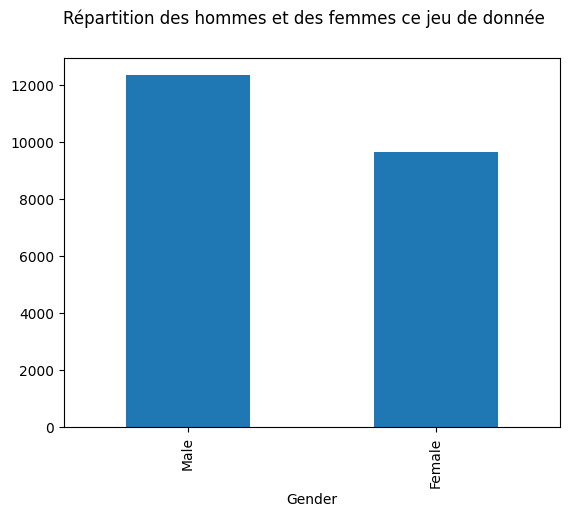

In [6]:
df_train["Gender"].value_counts().plot(kind="bar")
df_train["Gender"].value_counts()
plt.suptitle("Répartition des hommes et des femmes ce jeu de donnée")

## Analyse de la variable Tenure

- Le nombre de clients entre 1 et 9 compris sont répartits de manières assez similaire. 
- Il y a beacoup moins de client avec moins de 1 an d'ancienneté et aussi de plus de 9 ans d'ancienneté. 
- La moyenne est de 5 ans
- Avec un écart type de 2.8 ans
- 50% des clients ont une ancienneté compris entre 3 et 7 ans.


Tenure
8     2411
2     2401
4     2326
7     2300
3     2279
1     2273
5     2271
9     2259
6     2030
10     810
0      657
Name: count, dtype: int64

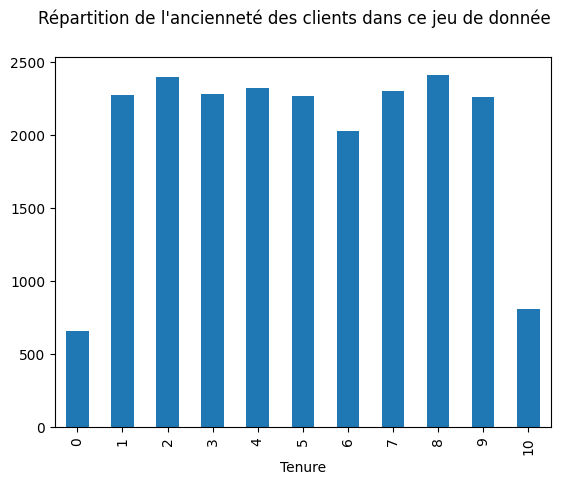

In [7]:
df_train["Tenure"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition de l'ancienneté des clients dans ce jeu de donnée")
df_train["Tenure"].value_counts()

In [8]:
df_train["Tenure"].describe()

count    22017.000000
mean         5.022028
std          2.820614
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable Tenure dans ce jeu de donnée')

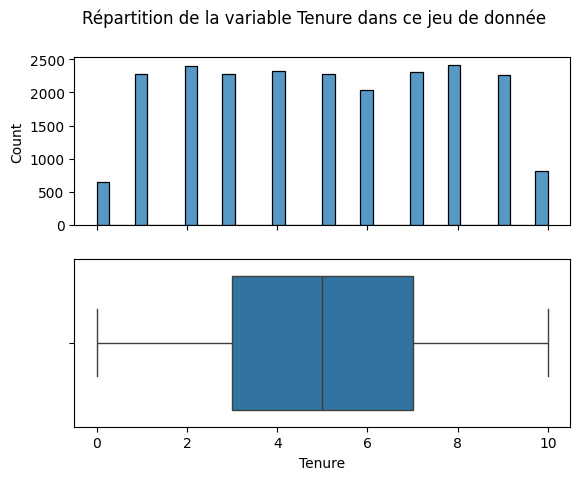

In [9]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=df_train, x="Tenure", ax=ax[0])
sns.boxplot(data=df_train, x="Tenure", ax=ax[1])
plt.suptitle("Répartition de la variable Tenure dans ce jeu de donnée")

## Analyse de la variable "NumOfProducts"

- La majorité des clients souscrivent à 1 ou 2 produits et très peu à plus de 2 produits.
- Quelles sont les clients les plus à risque de quitter la banques, ceux avec 1, 2, 3 ou 4 produits ?

NumOfProducts
2    11053
1    10483
3      415
4       66
Name: count, dtype: int64

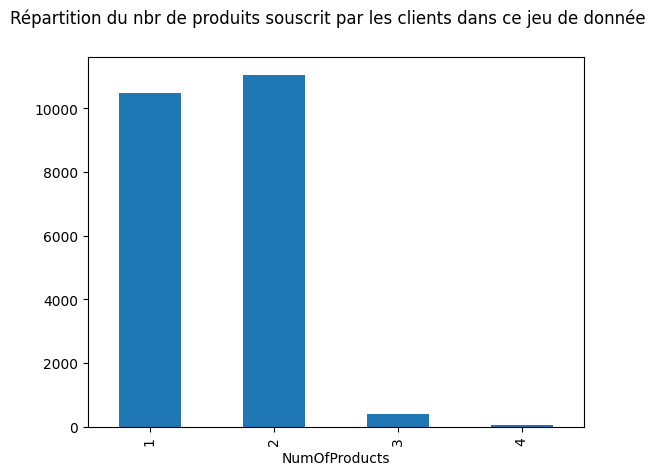

In [10]:
df_train["NumOfProducts"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition du nbr de produits souscrit par les clients dans ce jeu de donnée")
df_train["NumOfProducts"].value_counts()

## Analyse de la variable "Geography"

- La majorité des clients se situe en France, l'allemagne et l'espagne ont un nombre équivalent de clients.
- Dans quelle région les clients ont tendances à le plus partir ?

Geography
France     12309
Spain       4911
Germany     4797
Name: count, dtype: int64

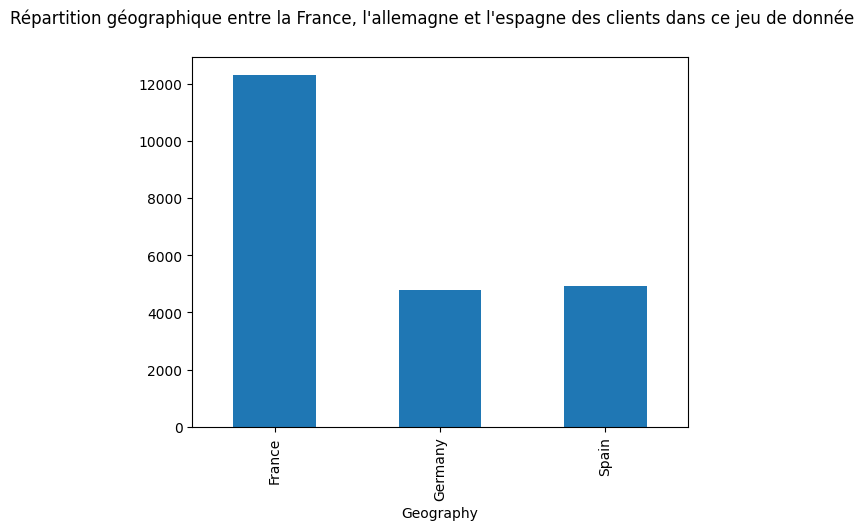

In [11]:
df_train["Geography"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition géographique entre la France, l'allemagne et l'espagne des clients dans ce jeu de donnée")
df_train["Geography"].value_counts()

## Analyse de la variable "HasCrCard"

- La majorité des clients possèdent une carte de crédit.
- 108274 clients ont une carte de crédit
- 35305 clients n'ont pas de carte de crédit

HasCrCard
1.0    16473
0.0     5544
Name: count, dtype: int64

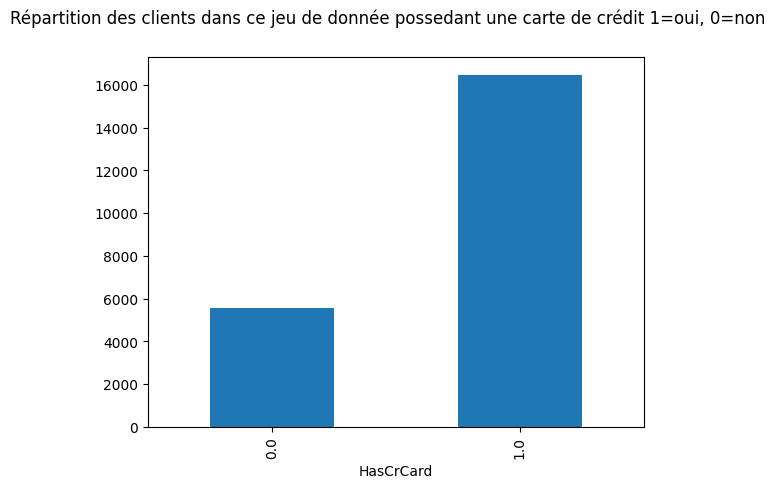

In [12]:
df_train["HasCrCard"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition des clients dans ce jeu de donnée possedant une carte de crédit 1=oui, 0=non")
df_train["HasCrCard"].value_counts()

## Analyse de la variable "IsActiveMember"

- Le nombre de clients actif et non actif sont réparti de manière égale<br>
- Les clients inactifs ont-ils plus tendances à partir ?

IsActiveMember
0.0    11065
1.0    10952
Name: count, dtype: int64

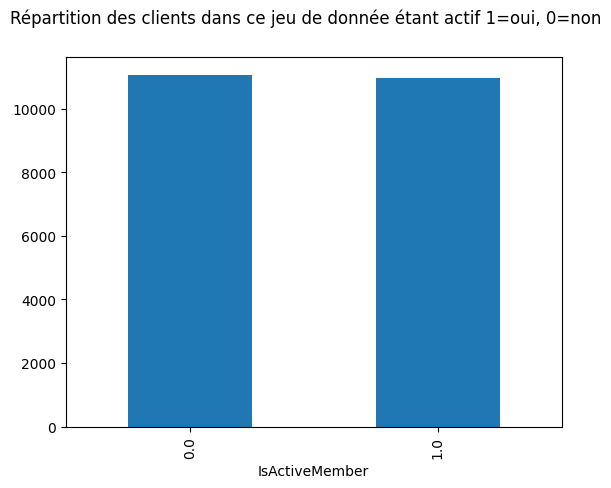

In [13]:
df_train["IsActiveMember"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition des clients dans ce jeu de donnée étant actif 1=oui, 0=non")
df_train["IsActiveMember"].value_counts()

## Analyse de la variable "Exited"

- 113129 clients sont actifs
- 30450 clients ont résiliés

Exited
0    17402
1     4615
Name: count, dtype: int64

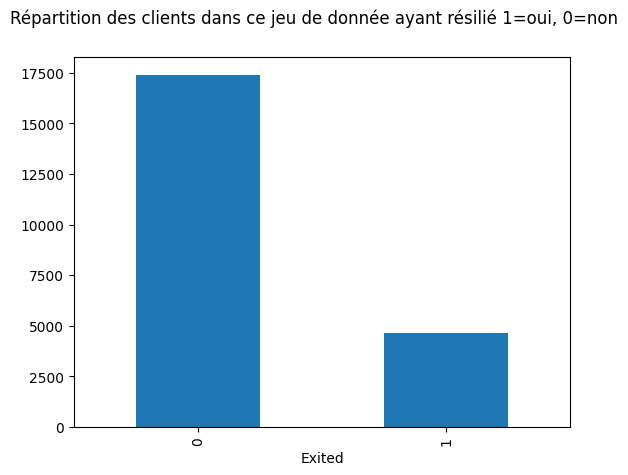

In [14]:
df_train["Exited"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition des clients dans ce jeu de donnée ayant résilié 1=oui, 0=non")
df_train["Exited"].value_counts()


Analyse de variables continues<br>

avec describe et histo + boxplot

## Analyse de la variable "CreditScore"

- La moyenne du score de crédit en France, Allemagne et Espagne est de 656 sur les 10 dernières année
- Avec un écart type de 80.21
- Une médiane de 659
- Un minimum de 350 et un maximum de 850

In [15]:
df_train["CreditScore"].describe()

count    22017.000000
mean       656.919380
std         79.761544
min        350.000000
25%        597.000000
50%        660.000000
75%        710.000000
max        850.000000
Name: CreditScore, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable CreditScore dans ce jeu de donnée')

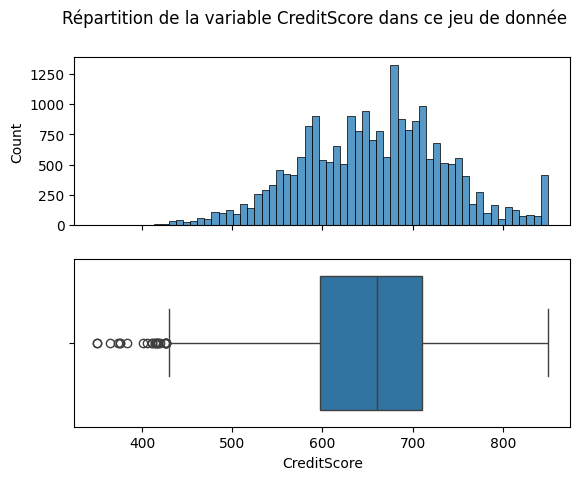

In [16]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=df_train, x="CreditScore", ax=ax[0])
sns.boxplot(data=df_train, x="CreditScore", ax=ax[1])
plt.suptitle("Répartition de la variable CreditScore dans ce jeu de donnée")

## Analyse de la variable "Balance"

- La moyenne du solde des clients est de 55533€
- L'écart type est de 62822€
- La médiane est de 0€
- Un mini de 0€ et un maxi de 250898€
- Seulement 25% des clients possède un solde positif supérieur à 0€

In [17]:
df_train["Balance"].describe()

count     22017.000000
mean      59286.936673
std       63157.150924
min           0.000000
25%           0.000000
50%           0.000000
75%      121537.710000
max      250898.090000
Name: Balance, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable Balance dans ce jeu de donnée')

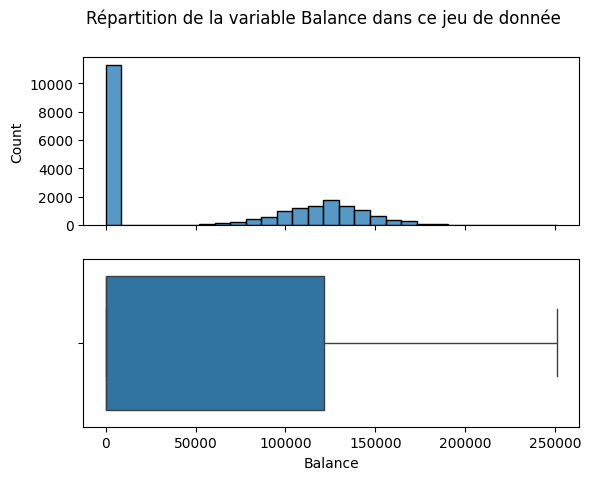

In [18]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=df_train, x="Balance", ax=ax[0])
sns.boxplot(data=df_train, x="Balance", ax=ax[1])
plt.suptitle("Répartition de la variable Balance dans ce jeu de donnée")

## Analyse de la variable "EstimatedSalary"

- Le salaire moyen des clients est de 112530€ (€?, Annuel, mensuel ?)
- l'écart type est de 50301€
- La médiane est de 117931€

In [19]:
df_train["EstimatedSalary"].describe()

count     22017.000000
mean     113717.033307
std       49287.879466
min         106.670000
25%       77515.780000
50%      119368.990000
75%      154870.580000
max      199992.480000
Name: EstimatedSalary, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable EstimatedSalary dans ce jeu de donnée')

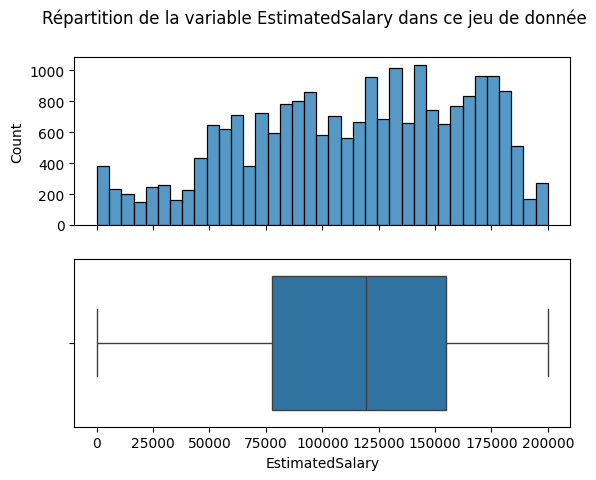

In [20]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=df_train, x="EstimatedSalary", ax=ax[0])
sns.boxplot(data=df_train, x="EstimatedSalary", ax=ax[1])
plt.suptitle("Répartition de la variable EstimatedSalary dans ce jeu de donnée")

## Analyse de la variable "Age"

- La moyenne d'age des clients est de 38 ans
- L'écart type est de 8.87 ans
- La médiane est de 37 ans
- Les clients ont entre 18 et 92 ans
- 50% des clients ont entre 32 et 42 ans

In [21]:
df_train["Age"].describe()

count    22017.000000
mean        38.091177
std          8.797810
min         18.000000
25%         32.000000
50%         37.000000
75%         42.000000
max         92.000000
Name: Age, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable Age dans ce jeu de donnée')

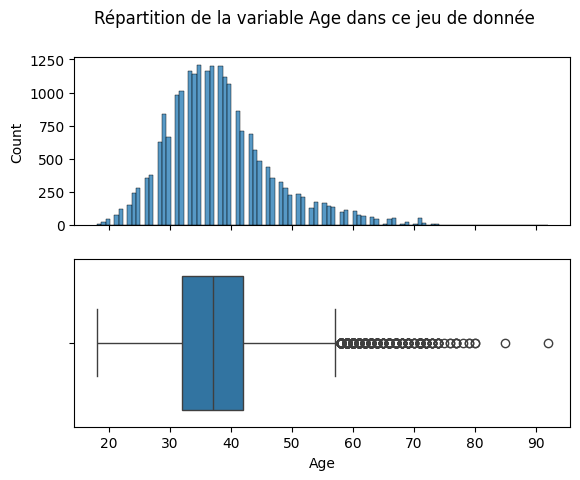

In [22]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=df_train, x="Age", ax=ax[0])
sns.boxplot(data=df_train, x="Age", ax=ax[1])
plt.suptitle("Répartition de la variable Age dans ce jeu de donnée")

# En +

## 1. Y a-t-il une corrélation entre le CreditScore et Geography ?

- A priori non

In [23]:
df_train.groupby("Geography")["CreditScore"].mean()


Geography
France     656.644569
Germany    657.698979
Spain      656.846671
Name: CreditScore, dtype: float64

## 2. Corrélation entre Balance et Age ?

- Les allemands n'ont pas ou nettement moins de comptes à 0€ comparé à la France et L'Espagne dans ce jeu de donnée.

<Axes: xlabel='Age', ylabel='Balance'>

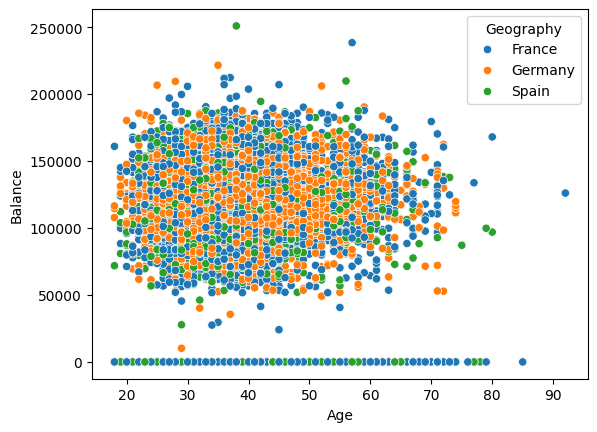

In [24]:
sns.scatterplot(data=df_train, x="Age", y="Balance", hue="Geography")


## 3. Corrélation entre l'ancienneté et l'âge

-L'âge n'est pas corrélé à l'ancienneté (Tenure) dans ce dataset.

In [25]:
df_train.groupby("Tenure")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Tenure,,,,,,,,
0,657.0,38.578387,8.773941,21.0,33.0,37.0,44.0,75.0
1,2273.0,38.159894,8.984271,19.0,32.0,37.0,43.0,92.0
2,2401.0,37.909204,8.588175,18.0,32.0,37.0,42.0,79.0
3,2279.0,37.885476,8.642777,18.0,32.0,37.0,42.0,72.0
4,2326.0,38.211952,8.951927,18.0,32.0,37.0,43.0,74.0
5,2271.0,38.096874,8.945323,19.0,32.0,37.0,42.0,79.0
6,2030.0,38.100000,8.874535,18.0,32.0,37.0,42.0,74.0
7,2300.0,37.959130,8.590438,18.0,32.0,37.0,42.0,80.0
8,2411.0,38.070095,8.691321,18.0,32.0,37.0,42.0,80.0


In [26]:
df_train[["Age", "Tenure"]].corr()


,Age,Tenure
Age,1.000000,0.001435
Tenure,0.001435,1.000000


<Axes: xlabel='Tenure', ylabel='Age'>

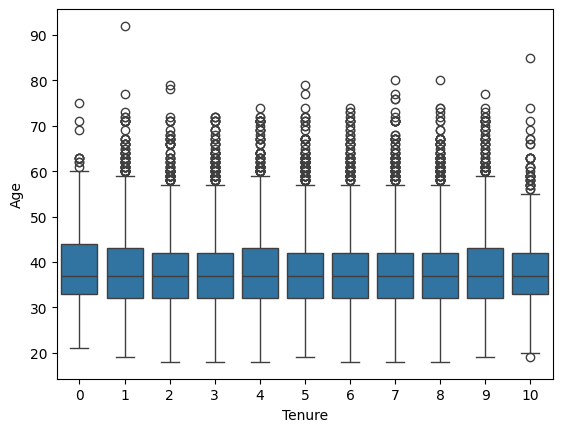

In [27]:
sns.boxplot(x="Tenure", y="Age", data=df_train)

## 4. Y a-t-il une corrélation avec la variable "Geography" et "IsActiveMember"

- L'allemagne semble avoir plus de membre inactif que la France et l'Espagne
- France 50.4% de client actif
- Allemagne 46% de client actif
- Espagne 51.1% de client actif

In [28]:
pd.crosstab(df_train["Geography"], df_train["IsActiveMember"], normalize="index")


IsActiveMember,0.0,1.0
Geography,,
France,0.493866,0.506134
Germany,0.546383,0.453617
Spain,0.481572,0.518428


<Axes: xlabel='Geography'>

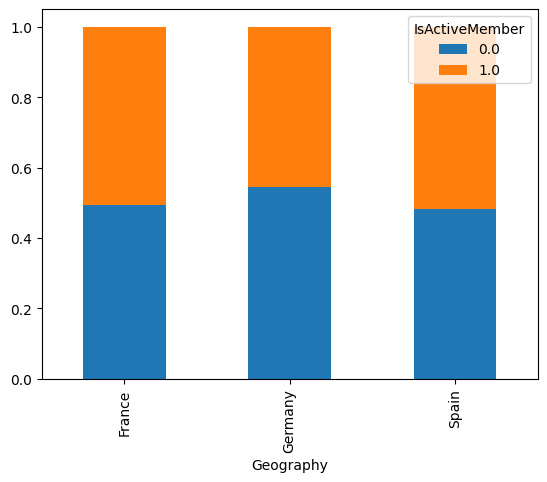

In [29]:
pd.crosstab(df_train["Geography"], df_train["IsActiveMember"], normalize="index").plot(kind="bar", stacked=True)

In [30]:
df_train.groupby("Geography")["NumOfProducts"].value_counts(normalize=True).unstack()


NumOfProducts,1,2,3,4
Geography,,,,
France,0.446340,0.537818,0.013730,0.002112
Germany,0.582239,0.381697,0.030436,0.005629
Spain,0.447159,0.529831,0.020362,0.002647


<Axes: xlabel='Geography', ylabel='Age'>

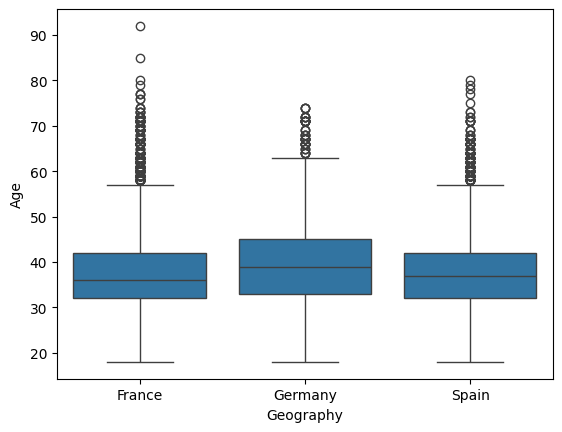

In [31]:
sns.boxplot(data=df_train, x="Geography", y="Age")


In [32]:
df_train.groupby("Geography")["Balance"].mean()


Geography
France      41662.119495
Germany    121676.913950
Spain       42520.321658
Name: Balance, dtype: float64

In [33]:
df_train.query("Balance == 0")["IsActiveMember"].value_counts(normalize=True)


IsActiveMember
1.0    0.50319
0.0    0.49681
Name: proportion, dtype: float64

In [34]:
df_train.query("Balance > 0")["IsActiveMember"].value_counts(normalize=True)


IsActiveMember
0.0    0.50862
1.0    0.49138
Name: proportion, dtype: float64

In [35]:
df_train.query("Balance == 0")["Exited"].value_counts(normalize=True)


Exited
0    0.836523
1    0.163477
Name: proportion, dtype: float64

In [36]:
df_train.query("Balance > 0")["Exited"].value_counts(normalize=True)


Exited
0    0.741869
1    0.258131
Name: proportion, dtype: float64